# **Rapport Mini Projet 3 - Groupe 2**

---

---

Ce rapport se concentre sur l'analyse des données issues du dataset **"Airline_customer_satisfaction 2"**, qui comporte **129880 entrées** et **22 variables**. Le but de ce mini-projet est de renforcer les compétences en traitement des données, de l'importation à l'analyse, pour appuyer des prises de décisions basées sur des faits.

En examinant plusieurs aspects de l'expérience client dans l'aviation, tels que **la satisfaction des passagers**, **les types de voyages**, **les retards** et **la qualité des services**, nous avons structuré l'analyse en plusieurs étapes :

- **Imports et Lecture des Données**
- **Préparation des Données**
- **Compréhension des Caractéristiques**
- **Relations entre les Caractéristiques**

L'objectif final est de dégager des tendances et des insights exploitables pour **améliorer la satisfaction des clients** et **optimiser les opérations** des compagnies aériennes.

---
> ## Imports et Lecture des Données
---

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Airline_customer_satisfaction 2.csv'
df = pd.read_csv(file_path)

df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [4]:
data = df.copy()

In [5]:
# Dictionnaire des noms de colonnes en anglais et leur traduction en français
colonnes_francaises = {
    'satisfaction': 'satisfaction',
    'Customer Type': 'Type de Client',
    'Age': 'Âge',
    'Type of Travel': 'Type de Voyage',
    'Class': 'Classe',
    'Flight Distance': 'Distance de Vol',
    'Seat comfort': 'Confort du Siège',
    'Departure/Arrival time convenient': 'Heure Départ/Arrivée Convenable',
    'Food and drink': 'Nourriture et Boissons',
    'Gate location': 'Emplacement de la Porte',
    'Inflight wifi service': 'Service Wifi en Vol',
    'Inflight entertainment': 'Divertissement en Vol',
    'Online support': 'Support en Ligne',
    'Ease of Online booking': 'Facilité de Réservation en Ligne',
    'On-board service': 'Service à Bord',
    'Leg room service': 'Service d’Espace pour les Jambes',
    'Baggage handling': 'Gestion des Bagages',
    'Checkin service': 'Service d’Enregistrement',
    'Cleanliness': 'Propreté',
    'Online boarding': 'Embarquement en Ligne',
    'Departure Delay in Minutes': 'Retard au Départ en Minutes',
    'Arrival Delay in Minutes': 'Retard à l’Arrivée en Minutes'
}

# Renommer les colonnes du dataset
data.rename(columns=colonnes_francaises, inplace=True)

# Vérification des nouvelles colonnes
data.columns

Index(['satisfaction', 'Type de Client', 'Âge', 'Type de Voyage', 'Classe',
       'Distance de Vol', 'Confort du Siège',
       'Heure Départ/Arrivée Convenable', 'Nourriture et Boissons',
       'Emplacement de la Porte', 'Service Wifi en Vol',
       'Divertissement en Vol', 'Support en Ligne',
       'Facilité de Réservation en Ligne', 'Service à Bord',
       'Service d’Espace pour les Jambes', 'Gestion des Bagages',
       'Service d’Enregistrement', 'Propreté', 'Embarquement en Ligne',
       'Retard au Départ en Minutes', 'Retard à l’Arrivée en Minutes'],
      dtype='object')

In [6]:
data.head(2)

,satisfaction,Type de Client,Âge,Type de Voyage,Classe,Distance de Vol,Confort du Siège,Heure Départ/Arrivée Convenable,Nourriture et Boissons,Emplacement de la Porte,...,Support en Ligne,Facilité de Réservation en Ligne,Service à Bord,Service d’Espace pour les Jambes,Gestion des Bagages,Service d’Enregistrement,Propreté,Embarquement en Ligne,Retard au Départ en Minutes,Retard à l’Arrivée en Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   satisfaction                      129880 non-null  object 
 1   Type de Client                    129880 non-null  object 
 2   Âge                               129880 non-null  int64  
 3   Type de Voyage                    129880 non-null  object 
 4   Classe                            129880 non-null  object 
 5   Distance de Vol                   129880 non-null  int64  
 6   Confort du Siège                  129880 non-null  int64  
 7   Heure Départ/Arrivée Convenable   129880 non-null  int64  
 8   Nourriture et Boissons            129880 non-null  int64  
 9   Emplacement de la Porte           129880 non-null  int64  
 10  Service Wifi en Vol               129880 non-null  int64  
 11  Divertissement en Vol             129880 non-null  i

<Axes: ylabel='count'>

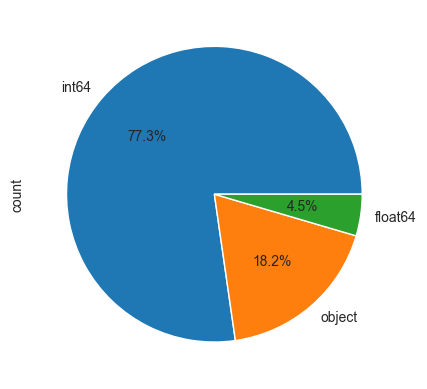

In [8]:
data.dtypes.value_counts().plot.pie(autopct='%1.1f%%')

### **Description du Dataset**

#### **1. Aperçu général**
- **Nombre total d'entrées :** 129 880
- **Nombre total de colonnes :** 22

---

#### **2. Détails des Colonnes**

##### 1. `satisfaction`
- **Type :** `object`
- **Description :** Niveau de satisfaction des clients (exemple : `satisfied`, `dissatisfied`).

##### 2. `Type de Client`
- **Type :** `object`
- **Description :** Catégorie du client (exemple : `Loyal Customer`, `Disloyal Customer`).

##### 3. `Âge`
- **Type :** `int64`
- **Description :** Âge des clients en années.

##### 4. `Type de Voyage`
- **Type :** `object`
- **Description :** Type de voyage (exemple : `Personal Travel`, `Business Travel`).

##### 5. `Classe`
- **Type :** `object`
- **Description :** Classe de vol (exemple : `Eco`, `Business`, `Eco Plus`).

##### 6. `Distance de Vol`
- **Type :** `int64`
- **Description :** Distance parcourue en kilomètres.

##### 7. `Confort du Siège`
- **Type :** `int64`
- **Description :** Évaluation du confort du siège (échelle de 0 à 5).

##### 8. `Heure Départ/Arrivée Convenable`
- **Type :** `int64`
- **Description :** Évaluation de la convenance des horaires de départ et d'arrivée.

##### 9. `Nourriture et Boissons`
- **Type :** `int64`
- **Description :** Évaluation de la qualité des repas et boissons.

##### 10. `Emplacement de la Porte`
- **Type :** `int64`
- **Description :** Évaluation de l'emplacement de la porte d'embarquement.

##### 11. `Service Wifi en Vol`
- **Type :** `int64`
- **Description :** Évaluation de la qualité du service Wi-Fi en vol.

##### 12. `Divertissement en Vol`
- **Type :** `int64`
- **Description :** Évaluation de la qualité du divertissement à bord.

##### 13. `Support en Ligne`
- **Type :** `int64`
- **Description :** Évaluation de la qualité du support client en ligne.

##### 14. `Facilité de Réservation en Ligne`
- **Type :** `int64`
- **Description :** Évaluation de la facilité d'utilisation de la plateforme de réservation.

##### 15. `Service à Bord`
- **Type :** `int64`
- **Description :** Évaluation du service à bord.

##### 16. `Service d’Espace pour les Jambes`
- **Type :** `int64`
- **Description :** Évaluation de l'espace pour les jambes.

##### 17. `Gestion des Bagages`
- **Type :** `int64`
- **Description :** Évaluation de la gestion des bagages.

##### 18. `Service d’Enregistrement`
- **Type :** `int64`
- **Description :** Évaluation de la qualité du service d'enregistrement.

##### 19. `Propreté`
- **Type :** `int64`
- **Description :** Évaluation de la propreté de l'avion.

##### 20. `Embarquement en Ligne`
- **Type :** `int64`
- **Description :** Évaluation de l'efficacité de l'embarquement en ligne.

##### 21. `Retard au Départ en Minutes`
- **Type :** `int64`
- **Description :** Retard au départ en minutes.

##### 22. `Retard à l’Arrivée en Minutes`
- **Type :** `float64`
- **Description :** Retard à l'arrivée en minutes.
- **Valeurs manquantes :** 393 valeurs manquantes.

---

#### **3. Analyse des Données**

##### **Types de Données** :
- **1 colonne** de type `float64` (Retard à l’Arrivée en Minutes)
- **17 colonnes** de type `int64` (principalement des évaluations sur différents aspects des vols)
- **4 colonnes** de type `object` (catégories textuelles)

##### **Valeurs manquantes** :
- La colonne `Retard à l’Arrivée en Minutes` contient 393 valeurs manquantes.
- Toutes les autres colonnes ont des valeurs complètes.

---
> ## **Préparation des Données**
---

### **Conversion des Types de Données pour Optimisation Mémoire**

L'objectif de cette section est de convertir certaines colonnes contenant des valeurs répétitives en type `category`. Cela permet de **réduire l'espace mémoire utilisé** et d'**améliorer les performances** lors de la manipulation des données.

---

#### **Étapes** :

##### 1. **Vérification des Valeurs Uniques dans les Colonnes Sélectionnées**
Avant de procéder à la conversion, il est important de vérifier le nombre de valeurs uniques présentes dans chaque colonne. Cela permet de s'assurer que la conversion en `category` est adaptée aux données.


In [9]:
# Définition des colonnes à vérifier
colonnes_categoriques = ['satisfaction', 'Type de Client', 'Type de Voyage', 'Classe']

print("=== Vérification des valeurs uniques avant conversion ===")
for col in colonnes_categoriques:
    valeurs_uniques = data[col].nunique()
    print(f"{col} : {valeurs_uniques} valeurs uniques")

=== Vérification des valeurs uniques avant conversion ===
satisfaction : 2 valeurs uniques
Type de Client : 2 valeurs uniques
Type de Voyage : 2 valeurs uniques
Classe : 3 valeurs uniques


###### **Résultats de la vérification des valeurs uniques** :

* **satisfaction : 2 valeurs uniques**  
  Variable binaire indiquant si un client est satisfait ou non.
  
* **Type de Client : 2 valeurs uniques**  
  Montre qu'il y a deux catégories de clients, rendant cette variable adaptée à la conversion.
  
* **Type de Voyage : 2 valeurs uniques**  
  Également binaire, indiquant les deux types de voyage possibles.
  
* **Classe : 3 valeurs uniques**  
  Trois catégories différentes, ce qui en fait aussi un bon candidat pour la conversion.
  

###### **Conclusion** :  
Tous ces champs ont un nombre limité de valeurs uniques, justifiant leur conversion en type `category` pour optimiser la mémoire.

##### 2. **Conversion des Colonnes en Type `category`**
Nous allons maintenant convertir ces colonnes en type category pour réduire l'espace mémoire utilisé et améliorer les performances.

In [10]:
# Conversion des colonnes identifiées en type 'category'
data[colonnes_categoriques] = data[colonnes_categoriques].astype('category')

##### 3. **Vérification des Types de Données Après Conversion**
Une fois la conversion effectuée, il est nécessaire de revérifier les types de données pour s'assurer que la conversion a bien été appliquée et que les colonnes sont désormais en type `category`.

In [11]:
print("\n=== Résumé des informations après conversion ===")
data.info()


=== Résumé des informations après conversion ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   satisfaction                      129880 non-null  category
 1   Type de Client                    129880 non-null  category
 2   Âge                               129880 non-null  int64   
 3   Type de Voyage                    129880 non-null  category
 4   Classe                            129880 non-null  category
 5   Distance de Vol                   129880 non-null  int64   
 6   Confort du Siège                  129880 non-null  int64   
 7   Heure Départ/Arrivée Convenable   129880 non-null  int64   
 8   Nourriture et Boissons            129880 non-null  int64   
 9   Emplacement de la Porte           129880 non-null  int64   
 10  Service Wifi en Vol               129880 non-null  int

### **Vérifier les doublons**

In [12]:
# Compter le nombre de valeurs dupliquées dans le dataset
duplicated_values = data.duplicated().sum()

duplicated_values

0

### **Vérifier les valeurs manquantes**

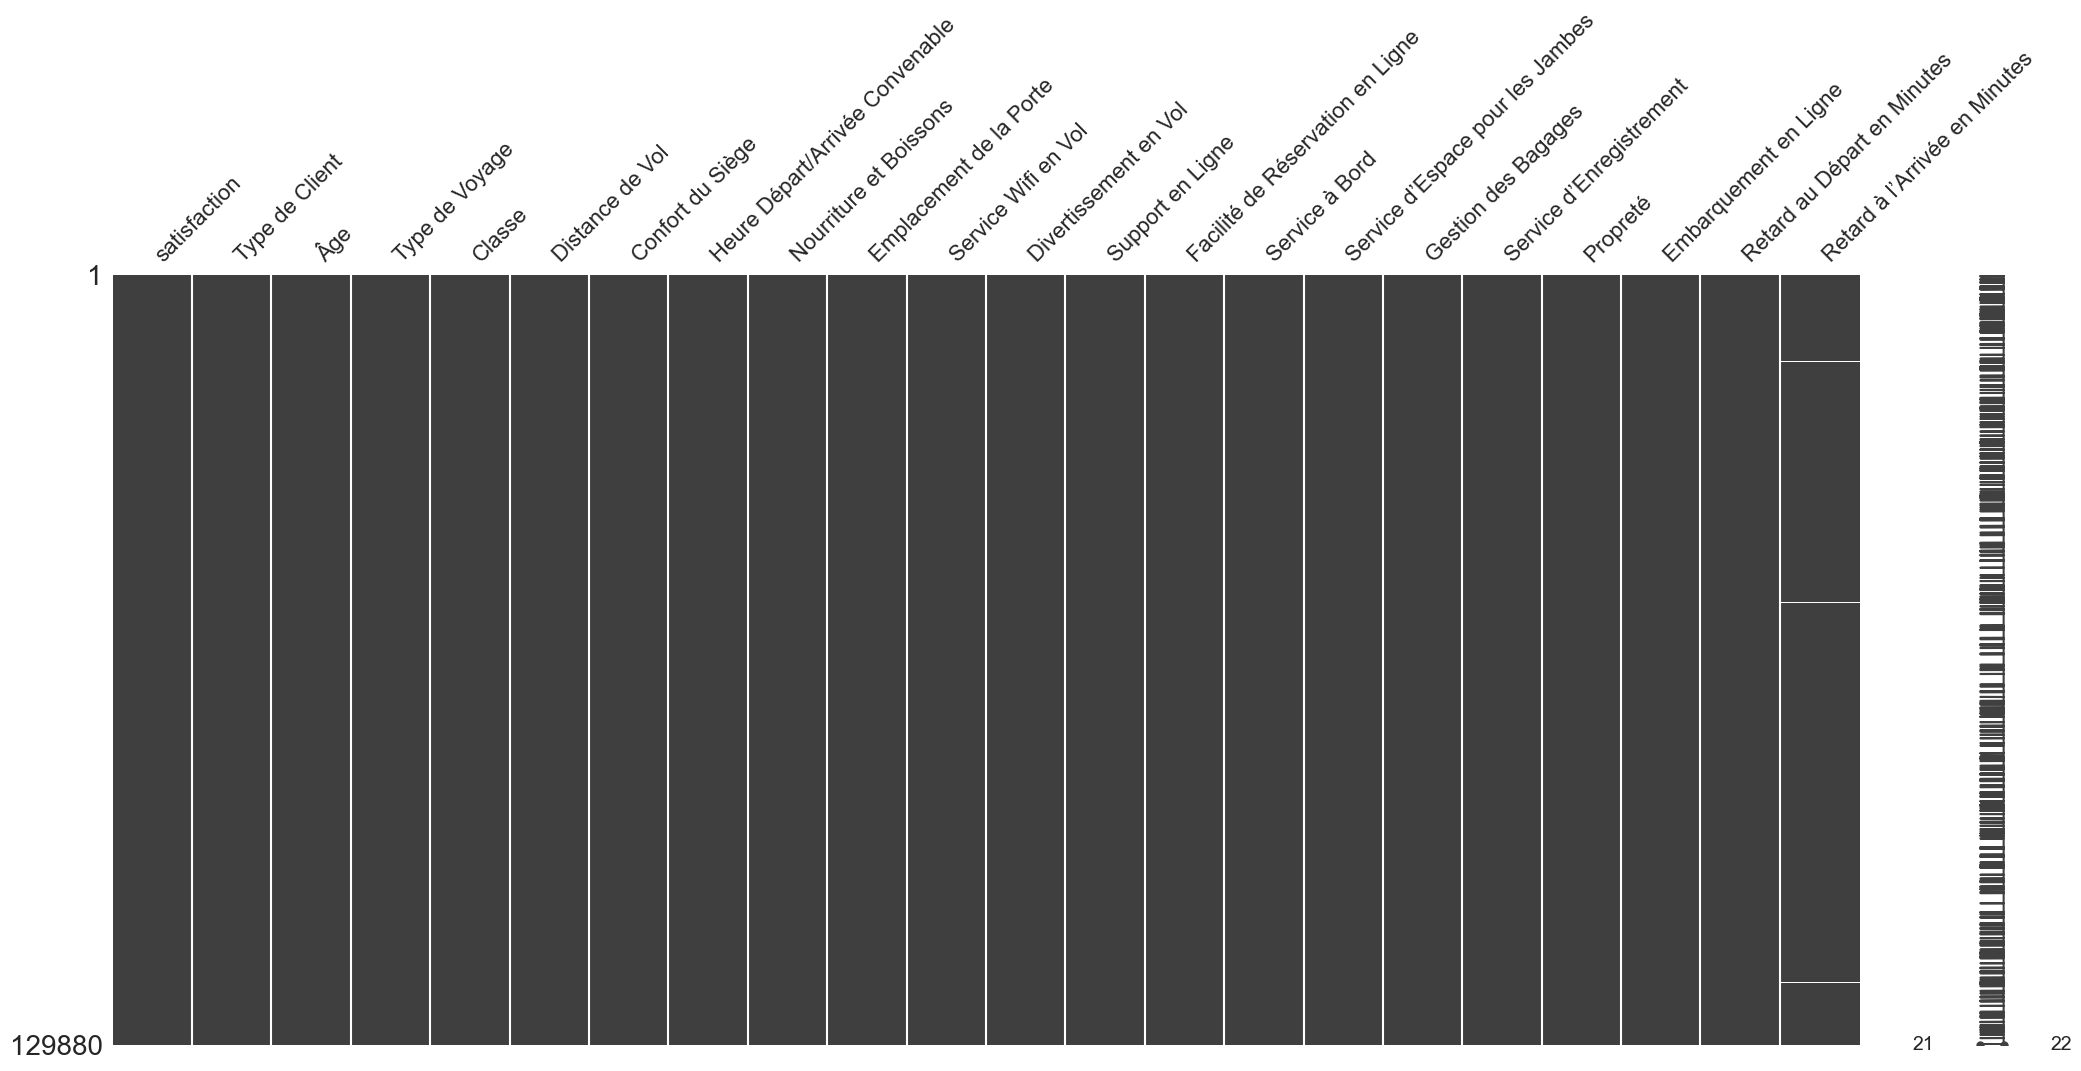

In [13]:
# Visualiser la matrice des valeurs manquantes
msno.matrix(data)
plt.show()

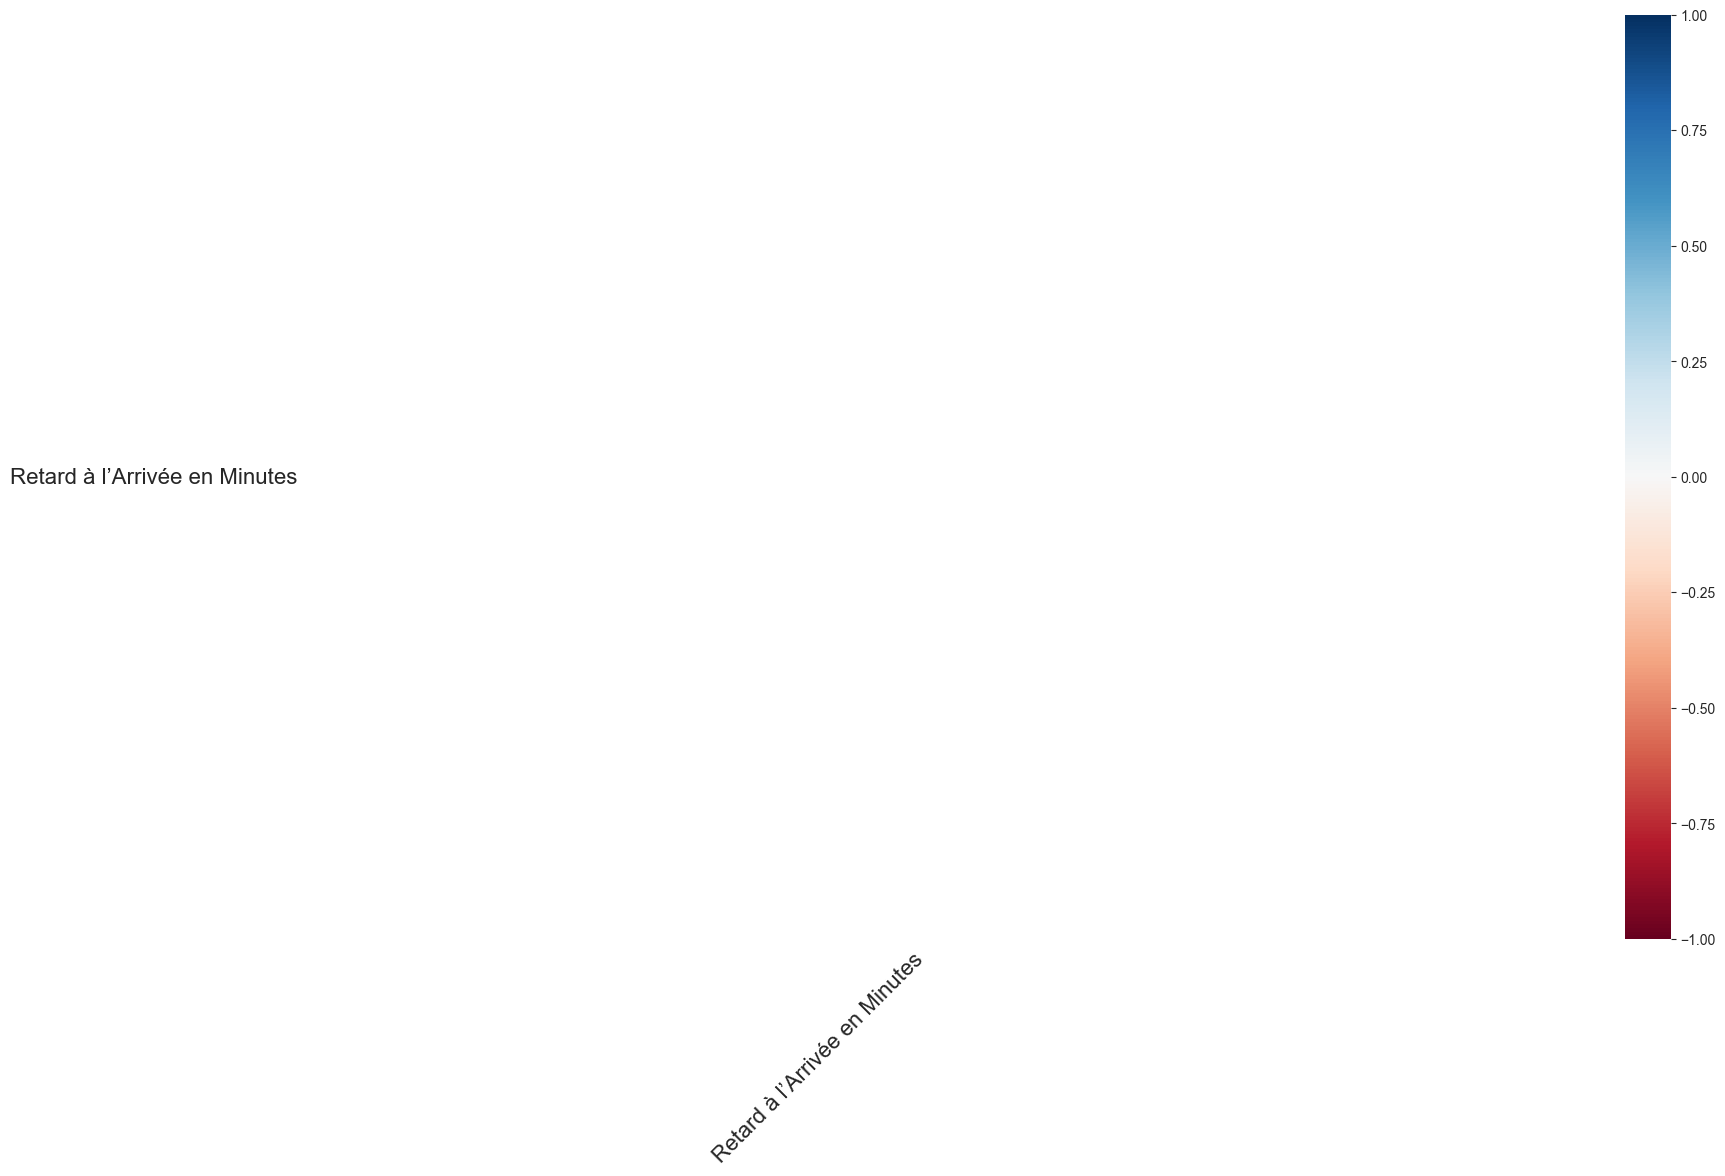

In [14]:
# Afficher une heatmap des corrélations entre les valeurs manquantes
msno.heatmap(data)
plt.show()

In [15]:
# Créer un tableau récapitulatif des valeurs manquantes par colonne, en affichant le nombre et le pourcentage
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_table

,Missing Values,Percentage
satisfaction,0,0.000000
Type de Client,0,0.000000
Âge,0,0.000000
Type de Voyage,0,0.000000
Classe,0,0.000000
Distance de Vol,0,0.000000
Confort du Siège,0,0.000000
Heure Départ/Arrivée Convenable,0,0.000000
Nourriture et Boissons,0,0.000000
Emplacement de la Porte,0,0.000000


In [16]:
# Suppression des valeurs manquantes
data = data.dropna(subset=['Retard à l’Arrivée en Minutes'])

# Tableau des valeurs manquantes par colonne après suppression
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_table

,Missing Values,Percentage
satisfaction,0,0.0
Type de Client,0,0.0
Âge,0,0.0
Type de Voyage,0,0.0
Classe,0,0.0
Distance de Vol,0,0.0
Confort du Siège,0,0.0
Heure Départ/Arrivée Convenable,0,0.0
Nourriture et Boissons,0,0.0
Emplacement de la Porte,0,0.0


### **Vérifier les valeurs aberrantes**

In [17]:
# Résumé statistique des colonnes numériques
data.describe()

,Âge,Distance de Vol,Confort du Siège,Heure Départ/Arrivée Convenable,Nourriture et Boissons,Emplacement de la Porte,Service Wifi en Vol,Divertissement en Vol,Support en Ligne,Facilité de Réservation en Ligne,Service à Bord,Service d’Espace pour les Jambes,Gestion des Bagages,Service d’Enregistrement,Propreté,Embarquement en Ligne,Retard au Départ en Minutes,Retard à l’Arrivée en Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [18]:
# Identification des valeurs aberrantes
# Fonction pour détecter les outliers en utilisant l'IQR
def identify_outliers_iqr(data):
    outlier_indices = []
    for column in data.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_indices.extend(outliers.index)

        print(f"Valeurs aberrantes dans {column} :")
        print(outliers[column].dropna(), "\n")
    
    return outlier_indices

# Appel de la fonction pour identifier les valeurs aberrantes avec IQR
outliers_iqr = identify_outliers_iqr(data)

Valeurs aberrantes dans Âge :
Series([], Name: Âge, dtype: int64) 

Valeurs aberrantes dans Distance de Vol :
540       6792
588       6591
1160      6470
1161      5322
1664      5127
          ... 
129402    4857
129420    5120
129528    4652
129580    5403
129778    4522
Name: Distance de Vol, Length: 2575, dtype: int64 

Valeurs aberrantes dans Confort du Siège :
Series([], Name: Confort du Siège, dtype: int64) 

Valeurs aberrantes dans Heure Départ/Arrivée Convenable :
Series([], Name: Heure Départ/Arrivée Convenable, dtype: int64) 

Valeurs aberrantes dans Nourriture et Boissons :
Series([], Name: Nourriture et Boissons, dtype: int64) 

Valeurs aberrantes dans Emplacement de la Porte :
Series([], Name: Emplacement de la Porte, dtype: int64) 

Valeurs aberrantes dans Service Wifi en Vol :
Series([], Name: Service Wifi en Vol, dtype: int64) 

Valeurs aberrantes dans Divertissement en Vol :
Series([], Name: Divertissement en Vol, dtype: int64) 

Valeurs aberrantes dans Support en Li

Les résultats montrent que certaines variables de notre dataset contiennent des valeurs aberrantes, notamment `Distance de Vol`, `Service à Bord`, `Service d’Enregistrement`, `Retard au Départ en Minutes`, et `Retard à l’Arrivée en Minutes`.
Ces valeurs aberrantes peuvent indiquer des cas extrêmes qui méritent d'être examinés plus en détail pour déterminer s'ils représentent des erreurs de saisie ou des situations réelles.

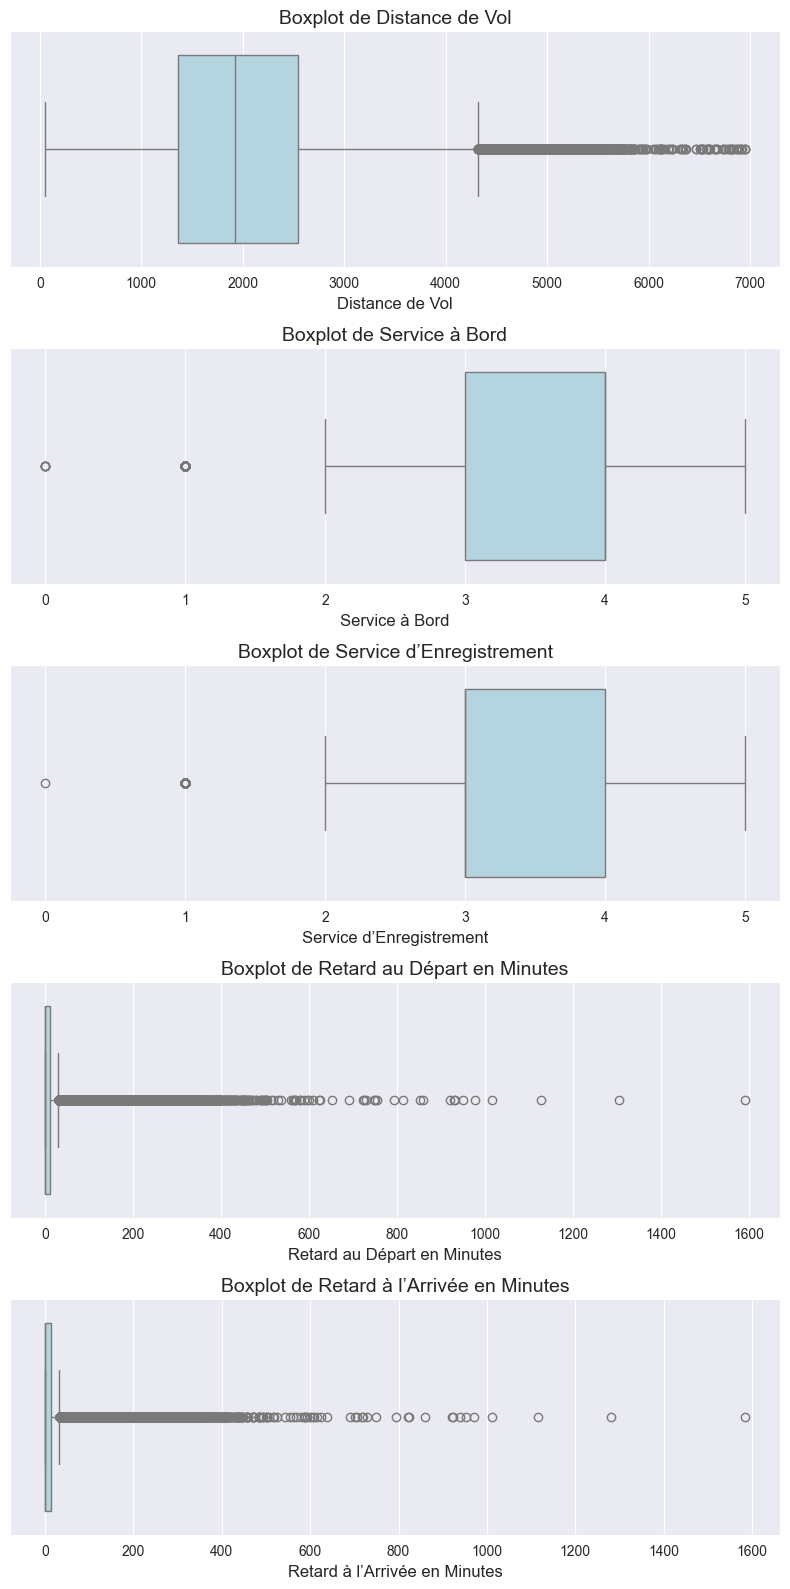

In [19]:
# Boxplots des variables qui contiennent des valeurs aberrantes

# Liste des colonnes avec des valeurs aberrantes
cols_with_outliers = ['Distance de Vol', 'Service à Bord', 'Service d’Enregistrement',
                      'Retard au Départ en Minutes', 'Retard à l’Arrivée en Minutes']

plt.figure(figsize=(8, 16))

for i, col in enumerate(cols_with_outliers, 1):
    plt.subplot(len(cols_with_outliers), 1, i)
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Boxplot de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

#### **Interprétation des Résultats**

1. **`Distance de Vol` :** Les valeurs aberrantes observées sont considérées comme normales selon les recherches effectuées. De plus, elles représentent une proportion relativement faible par rapport à l'ensemble des données, ce qui ne pose pas de problème significatif.

2. **`Service d’Enregistrement` :** Les notes aberrantes identifiées sur une échelle de 0 à 5 sont également jugées normales, ne remettant pas en cause la qualité des données.

3. **`Service à Bord` :** Comme pour le service d'enregistrement, les valeurs aberrantes sont des notes dans la même échelle de 0 à 5 et sont considérées comme acceptables.

4. **`Retard au Départ en Minutes` et `Retard à l’Arrivée en Minutes` :** Bien que des retards de plus de 10 heures soient rares, ils peuvent survenir pour des raisons telles que des conditions météorologiques extrêmes, des problèmes techniques ou des grèves. Ces valeurs, bien que élevées, ne représentent pas un nombre significatif par rapport au total des enregistrements.

#### **Conclusion**
L'analyse des valeurs aberrantes a révélé que, bien que certaines valeurs soient considérées comme atypiques, elles restent justifiables et ne compromettent pas l'intégrité des données. Les valeurs de distance de vol, ainsi que les notes des services d'enregistrement et à bord, sont toutes acceptables et n'indiquent pas de problèmes significatifs. De plus, les retards au départ et à l'arrivée, bien que rares, peuvent s'expliquer par des circonstances exceptionnelles. Par conséquent, **ces données peuvent être conservées pour une analyse plus approfondie, sans nécessiter de traitement ou d'exclusion**.


---
> ## **Compréhension des Caractéristiques**
---

Dans cette section, nous analysons les caractéristiques des données afin d'en extraire des informations significatives. Puisque l’objectif est de rester pertinent, nous nous concentrons uniquement sur les variables quantitatives les plus importantes dans notre dataset.

**Variables Quantitatives Sélectionnées**

- **Âge**
- **Distance de Vol**
- **Retard au Départ en Minutes**
- **Retard à l’Arrivée en Minutes**

### **Statistiques Descriptives des Variables Quantitatives**

Nous débutons par une analyse **statistique descriptive** des variables quantitatives sélectionnées afin de comprendre leur échelle, leur moyenne et leur dispersion.


In [20]:
# Statistiques descriptives pour les variables quantitatives sélectionnées
data[['Âge', 'Distance de Vol', 'Retard au Départ en Minutes', 'Retard à l’Arrivée en Minutes']].describe()

,Âge,Distance de Vol,Retard au Départ en Minutes,Retard à l’Arrivée en Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,14.643385,15.091129
std,15.117597,1026.884131,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000
50%,40.000000,1924.000000,0.000000,0.000000
75%,51.000000,2543.000000,12.000000,13.000000
max,85.000000,6951.000000,1592.000000,1584.000000


#### **Analyse des Variables Quantitatives**

##### Âge
- **Âge moyen** : 39,4 ans
- **Écart-type** : 15,1  
  Indique une dispersion notable autour de la moyenne, avec une population assez diversifiée.
- **Âge minimal** : 7 ans
- **Âge maximal** : 85 ans  
  Montre la présence de jeunes et de personnes âgées parmi les passagers.
- **Médiane** : 40 ans  
  La moitié des passagers a moins de 40 ans.

##### Distance de Vol
- **Distance moyenne** : 1981 km
- **Écart-type** : 1026 km  
  Montre une forte diversité dans la longueur des trajets.
- **Distance minimale** : 50 km
- **Distance maximale** : 6951 km  
  Illustre la variété des types de vols.
- **Médiane** : 1924 km  
  La majorité des vols sont de distance moyenne.

##### Retard au Départ en Minutes
- **Médiane** : 0 minute  
  La majorité des vols n'ont pas de retard au départ.
- **Retard moyen** : 14,6 minutes
- **Écart-type** : 37,9 minutes  
  Indique des retards considérables pour certains vols.
- **Retard maximal** : 1592 minutes (environ 26,5 heures)  
  Un cas extrême mais possible.

##### Retard à l’Arrivée en Minutes
- **Médiane** : 0 minute  
  Comme pour les départs, la majorité des vols n’ont pas de retard à l’arrivée.
- **Retard moyen** : 15 minutes
- **Écart-type** : 38,4 minutes  
  Montre des écarts similaires à ceux du départ.
- **Retard maximal** : 1584 minutes (environ 26,4 heures)  
  Cas extrêmes, bien que rares.

### **Distribution des Variables Catégoriques**

Nous analysons également les variables catégoriques pour comprendre la répartition des passagers en termes de satisfaction, type de client, type de voyage et classe.


In [21]:
# Importation de la fonction 'display' de la bibliothèque IPython
# Cette fonction permet d'afficher des objets, tels que des DataFrames, de manière formatée dans un Jupyter Notebook,
# améliorant ainsi la lisibilité et la présentation des résultats.
from IPython.display import display

# Comptage des occurrences dans les variables catégoriques
satisfaction_counts = data['satisfaction'].value_counts().reset_index()
satisfaction_counts.columns = ['Satisfaction', 'Count']

client_type_counts = data['Type de Client'].value_counts().reset_index()
client_type_counts.columns = ['Type de Client', 'Count']

trip_type_counts = data['Type de Voyage'].value_counts().reset_index()
trip_type_counts.columns = ['Type de Voyage', 'Count']

class_counts = data['Classe'].value_counts().reset_index()
class_counts.columns = ['Classe', 'Count']

# Affichage des résultats sous forme de petits DataFrames
print("Satisfaction des Clients")
display(satisfaction_counts)

print("Type de Client")
display(client_type_counts)

print("Type de Voyage")
display(trip_type_counts)

print("Classe des Passagers")
display(class_counts)

Satisfaction des Clients


,Satisfaction,Count
0,satisfied,70882
1,dissatisfied,58605


Type de Client


,Type de Client,Count
0,Loyal Customer,105773
1,disloyal Customer,23714


Type de Voyage


,Type de Voyage,Count
0,Business travel,89445
1,Personal Travel,40042


Classe des Passagers


,Classe,Count
0,Business,61990
1,Eco,58117
2,Eco Plus,9380


#### **Analyse des Variables Catégoriques**

##### Satisfaction
- **Clients satisfaits** : 70 882 (environ 55%)
- **Clients insatisfaits** : 58 605 (environ 45%)  
  Indique un besoin d'amélioration dans certains aspects du service.

##### Type de Client
- **Clients fidèles** : 105 773 (environ 82%)
- **Clients occasionnels** : 23 714 (environ 18%)  
  Une proportion élevée de clients fidèles pourrait indiquer une bonne fidélisation, mais cela souligne aussi la nécessité d'attirer de nouveaux clients.

##### Type de Voyage
- **Voyages d'affaires** : 89 445 (environ 69%)
- **Voyages personnels** : 40 042 (environ 31%)  
  Une forte demande pour les voyages d'affaires, ce qui pourrait influencer les stratégies de marketing.

##### Classe
- **Classe affaires** : 61 990 (environ 48%)
- **Classe économique** : 58 117 (environ 45%)
- **Classe économique plus** : 9 380 (environ 7%)  
  La répartition des passagers dans les différentes classes peut influencer les décisions concernant l'allocation des ressources.

### **Conclusion**

Les résultats montrent une diversité significative dans l’âge des passagers, ainsi que dans les types de vols effectués, avec une répartition variée entre courts et longs courriers. Les retards, bien que peu fréquents en général, peuvent atteindre des durées exceptionnelles dans de rares cas. Du côté des variables catégoriques, une majorité de clients sont satisfaits, fidèles et voyagent pour affaires, souvent en classe affaires ou économique. Cela souligne l'importance d'optimiser les services et de répondre aux attentes des clients pour maintenir leur satisfaction et fidélité.

---
> ## **Relations entre les Caractéristiques**
---

Dans cette section, nous allons explorer les relations entre différentes caractéristiques du dataset afin de dégager des informations clés sur les facteurs influençant la satisfaction des clients, les retards, et d'autres aspects pertinents. Nous adopterons une approche analytique intégrée, combinant corrélations, tests statistiques, régressions et visualisations pour tirer des conclusions significatives.

### 1.**Analyse des Corrélations entre Variables Quantitatives**

Nous commencerons par examiner la corrélation entre les variables quantitatives pour déterminer comment elles s'influencent mutuellement. Cela nous aidera à identifier les variables les plus significatives qui peuvent impacter la satisfaction des clients et les retards.

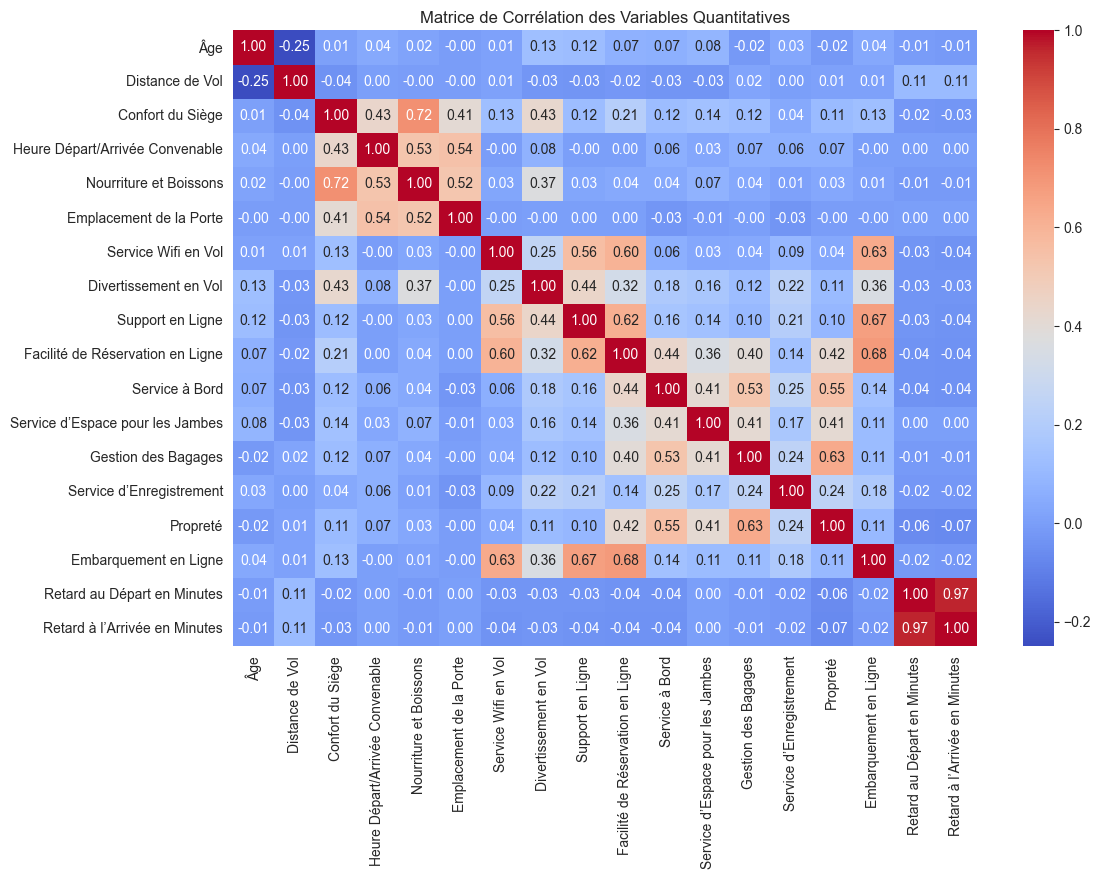

In [22]:
# Filtrer les colonnes numériques uniquement
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calcul des corrélations
correlation_matrix = numerical_data.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Variables Quantitatives')
plt.show()

#### **Interprétation**

**Confort du Siège** :  
Une forte corrélation positive (**0.72**) avec la **Nourriture et Boissons** indique que les passagers qui évaluent le confort des sièges de manière positive ont également tendance à apprécier la qualité de la nourriture et des boissons. Cela suggère que le confort peut influencer les perceptions de qualité globale.

**Heure Départ/Arrivée Convenable** :  
Cette variable montre une forte corrélation avec **Nourriture et Boissons** (**0.53**) et **Emplacement de la Porte** (**0.54**). Cela indique que les passagers qui trouvent l'heure de départ et d'arrivée convenable sont également plus susceptibles d'apprécier la qualité de la nourriture et la proximité de la porte d'embarquement.

**Service à Bord** :  
Avec une corrélation notable (**0.53**) avec la **Gestion des Bagages**, cela souligne l'importance d'un bon service à bord, qui peut influencer positivement l'expérience des passagers en ce qui concerne la gestion des bagages.

**Propreté** :  
La corrélation positive (**0.63**) avec **Gestion des Bagages** et (**0.55**) avec **Service à Bord** suggère que des niveaux élevés de propreté dans l'avion sont perçus positivement par les passagers, ce qui peut contribuer à une meilleure évaluation des services fournis à bord.

**Divertissement en Vol** :  
Montre une corrélation positive avec **Support en Ligne** (**0.44**) et **Facilité de Réservation en Ligne** (**0.32**), indiquant que l'accès à un bon divertissement en vol est lié à une expérience positive lors de la réservation et du support en ligne.

#### **En résumé**
Ces corrélations mettent en lumière des aspects clés de l'expérience passager, où le confort, la qualité des services, et la propreté jouent des rôles essentiels dans la satisfaction globale. Ces insights peuvent guider des améliorations dans les services proposés pour augmenter la satisfaction des clients.
ions dans les services proposés pour augmenter la satisfaction des clients.


### 2. **Test de Chi-2 pour les Variables Catégorielles**

Nous utiliserons le test de Chi-2 pour analyser les relations entre les variables catégorielles, telles que la **satisfaction** et **type de client**, **Satisfaction** et **Classe**, **Satisfaction** et **Type de Voyage**. Ce test nous aidera à déterminer si les distributions observées diffèrent significativement des distributions attendues.

- **Satisfaction et Type de Client** :

In [23]:
# Importer la fonction chi2_contingency de scipy.stats pour effectuer un test du Chi-2
from scipy.stats import chi2_contingency

# Création d'un tableau de contingence pour Satisfaction et Type de Client
contingency_table = pd.crosstab(data['satisfaction'], data['Type de Client'])

# Résultat du test Chi-2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
chi2, p

(11081.641807674954, 0.0)

**Valeur du Chi-2** : 11081.64,
**Valeur** p : 0.0

**Interprétation** : La valeur du Chi-2 est très élevée, et la valeur p est extrêmement faible (inférieure à 0.05). Cela indique qu'il existe une forte dépendance entre le Type de Client (Nouveau ou Fidèle) et le niveau de Satisfaction. En d'autres termes, le type de client influence significativement la satisfaction des passagers. Il est probable que les clients fidèles aient tendance à être plus satisfaits que les nouveaux clients, probablement en raison de leur familiarité avec les services ou des avantages liés à leur fidélité.

- **Satisfaction et Classe** :

In [24]:
# Création d'un tableau de contingence pour Satisfaction et Classe
contingency_table = pd.crosstab(data['satisfaction'], data['Classe'])

# Résultat du test Chi-2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
chi2, p

(12635.400608233214, 0.0)

**Valeur du Chi-2** : 12635.40,
**Valeur p** : 0.0

**Interprétation** : Le Chi-2 est encore plus élevé pour cette relation, ce qui montre une très forte dépendance entre la Classe (Économique, Affaires, ou Première) et la Satisfaction. Cela signifie que la classe de voyage a un impact significatif sur la satisfaction des passagers. Il est probable que les passagers des classes Affaires et Première soient plus satisfaits que ceux de la classe Économique, en raison de meilleurs services et de plus de confort.

- **Satisfaction et Type de Voyage** :

In [25]:
# Création d'un tableau de contingence pour Satisfaction et Type de Voyage
contingency_table = pd.crosstab(data['satisfaction'], data['Type de Voyage'])

# Résultat du test Chi-2
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
chi2, p

(1535.426292974157, 0.0)

**Valeur du Chi-2** : 1535.42, 
**Valeur p** : 0.0

**Interprétation** : Bien que la valeur du Chi-2 soit plus faible que pour les autres variables, elle reste très élevée, ce qui indique une relation significative entre le Type de Voyage (Affaires ou Personnel) et la Satisfaction. Les passagers voyageant pour des raisons professionnelles peuvent avoir des attentes différentes ou des besoins spécifiques, ce qui influence leur satisfaction. Par exemple, les voyageurs d'affaires pourraient être plus exigeants concernant la ponctualité ou la commodité, ce qui peut affecter leur niveau de satisfaction.

### 3. **Régression Linéaire pour Analyser les Relations**

Dans cette section, nous allons examiner comment certaines variables quantitatives influencent les retards au départ et à l'arrivée. Cette analyse nous permettra d'identifier les facteurs qui peuvent avoir un impact significatif sur la satisfaction des clients.

- **Modèle de Régression pour les Retards au Départ**

Nous allons analyser les relations entre les retards au départ et plusieurs variables, telles que la distance de vol, le confort du siège, et la qualité des services.

In [26]:
# Importer le module statsmodels.api pour effectuer des analyses statistiques, y compris la régression linéaire
import statsmodels.api as sm

# Sélection des variables indépendantes et dépendantes
X = data[['Distance de Vol', 'Confort du Siège', 'Nourriture et Boissons', 
           'Service à Bord', 'Service d’Enregistrement']]
y_depart = data['Retard au Départ en Minutes']

# Ajout d'une constante pour le modèle
X = sm.add_constant(X)

# Modèle de régression pour les retards au départ
model_depart = sm.OLS(y_depart, X).fit()

# Résumé du modèle
summary_depart = model_depart.summary()

summary_depart

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Retard au Départ en Minutes   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                  0.014
Method:                          Least Squares   F-statistic:                     367.7
Date:                         Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                                 11:27:36   Log-Likelihood:            -6.5361e+05
No. Observations:                       129487   AIC:                         1.307e+06
Df Residuals:                           129481   BIC:                         1.307e+06
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.0996      0.473     25.566      0.000      11.172      13.027
Distance de Vol              0.0041      0.000     39.820      0.000       0.004       0.004
Confort du Siège            -0.3817      0.109     -3.508      0.000      -0.595      -0.168
Nourriture et Boissons      -0.0404      0.104     -0.388      0.698      -0.245       0.164
Service à Bord              -0.8635      0.086    -10.054      0.000      -1.032      -0.695
Service d’Enregistrement    -0.3959      0.086     -4.614      0.000      -0.564      -0.228
==============================================================================
Omnibus:                   163999.755   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         56345389.232
Skew:                           6.742   Prob(JB):                         0.00
Kurtosis:                     104.300   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Interprétation**

**R-squared (R²) : 0.014** : 
Ce coefficient montre la proportion de la variance expliquée par le modèle. Ici, seulement **1.4 %** de la variance des retards au départ est expliquée par les variables sélectionnées. Cela suggère que le modèle a une capacité limitée à prédire les retards au départ avec ces variables.

#### **Variables Explicatives et Coefficients** :

- **Constante (Intercept)** : 12.10  
  Cela signifie que, toutes choses égales par ailleurs, le retard moyen au départ est de **12.1 minutes**.

- **Distance de Vol** : 0.0041  
  Chaque kilomètre supplémentaire de distance de vol augmente en moyenne le retard au départ de **0.0041 minutes**. Cette relation est significative avec un t-statistic élevé (39.82), ce qui montre que la distance de vol affecte légèrement les retards.

- **Confort du Siège** : -0.3817  
  Une meilleure note pour le confort du siège réduit légèrement le retard au départ (-0.38 minutes), avec une relation significative. Cela pourrait indiquer que des vols mieux notés pour le confort ont une gestion plus efficace.

- **Nourriture et Boissons** : -0.0404  
  Cette variable n'est pas statistiquement significative (P > 0.05), ce qui signifie qu'elle n'a pas d'impact notable sur les retards au départ.

- **Service à Bord** : -0.8635  
  Une meilleure note pour le service à bord réduit les retards au départ de **0.86 minutes**. Ce résultat est significatif, suggérant que des services plus efficaces en vol pourraient être associés à une meilleure gestion des vols.

- **Service d’Enregistrement** : -0.3959  
  Un meilleur service d’enregistrement est associé à une réduction du retard de **0.40 minutes**. Cela montre que l'efficacité du service d'enregistrement pourrait influencer positivement la ponctualité des départs.

- **Modèle de Régression pour les Retards à l'Arrivée**

Nous allons maintenant examiner les retards à l'arrivée en utilisant les mêmes variables.

In [27]:
# Variable dépendante pour les retards à l'arrivée
y_arrivee = data['Retard à l’Arrivée en Minutes']

# Modèle de régression pour les retards à l'arrivée
model_arrivee = sm.OLS(y_arrivee, X).fit()
summary_arrivee = model_arrivee.summary()

summary_arrivee

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Retard à l’Arrivée en Minutes   R-squared:                       0.014
Model:                                       OLS   Adj. R-squared:                  0.014
Method:                            Least Squares   F-statistic:                     369.1
Date:                           Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                                   11:27:39   Log-Likelihood:            -6.5541e+05
No. Observations:                         129487   AIC:                         1.311e+06
Df Residuals:                             129481   BIC:                         1.311e+06
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       13.3243      0.480     27.764      0.000      12.384      14.265
Distance de Vol              0.0041      0.000     39.230      0.000       0.004       0.004
Confort du Siège            -0.4023      0.110     -3.647      0.000      -0.619      -0.186
Nourriture et Boissons      -0.0667      0.106     -0.631      0.528      -0.274       0.140
Service à Bord              -0.9749      0.087    -11.195      0.000      -1.146      -0.804
Service d’Enregistrement    -0.4705      0.087     -5.408      0.000      -0.641      -0.300
==============================================================================
Omnibus:                   161119.372   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49165297.366
Skew:                           6.561   Prob(JB):                         0.00
Kurtosis:                      97.554   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Interprétation**

- **R-squared (R²) : 0.014**  
  Comme pour les retards au départ, seulement **1.4 %** de la variance des retards à l’arrivée est expliquée par ce modèle. Il s’agit également d’une faible proportion, indiquant que d’autres facteurs non inclus dans le modèle influencent les retards à l’arrivée.

#### **Variables Explicatives et Coefficients** :

- **Constante (Intercept) : 13.32**  
  Cela indique qu’en l’absence des autres variables, le retard moyen à l’arrivée serait de **13.32 minutes**.

- **Distance de Vol : 0.0041**  
  Comme pour les retards au départ, la distance de vol est positivement associée aux retards à l’arrivée (**0.0041 minutes par kilomètre**). La relation est significative, montrant que des vols plus longs peuvent entraîner des retards plus importants.

- **Confort du Siège : -0.4023**  
  Un meilleur confort du siège est également associé à une légère réduction des retards à l’arrivée (**-0.40 minutes**), suggérant que des passagers plus satisfaits du confort pourraient être liés à une meilleure gestion des vols.

- **Nourriture et Boissons : -0.0667**  
  Comme pour les retards au départ, cette variable n’a pas d'impact significatif sur les retards à l’arrivée (P > 0.05).

- **Service à Bord : -0.9749**  
  Une meilleure note pour le service à bord réduit le retard à l’arrivée de **0.97 minutes**. Ce résultat est significatif, soulignant que des services plus efficaces en vol pourraient réduire les retards.

- **Service d’Enregistrement : -0.4705**  
  Un meilleur service d'enregistrement réduit les retards à l’arrivée de **0.47 minutes**, avec une relation significative. Cela indique que l'efficacité de ce service a un impact positif sur la ponctualité des vols.

### **Conclusion**

Dans les deux modèles, plusieurs variables influencent significativement les retards au départ et à l'arrivée :

- **Distance de Vol** a une influence positive (les vols plus longs sont associés à des retards plus importants).
- **Confort du Siège**, **Service à Bord**, et **Service d’Enregistrement** ont des effets négatifs significatifs (de meilleures évaluations de ces services sont associées à des retards réduits).

Cependant, la faible valeur de **R-squared (1.4 %)** dans les deux modèles montre que ces variables n'expliquent qu'une petite partie de la variation des retards. Cela suggère qu'il existe d'autres facteurs, non inclus dans ces modèles, qui influencent fortement les retards (par exemple, des facteurs extérieurs comme la météo ou des contraintes de l’espace aérien).


### 4. **Analyse des Retards et de la Satisfaction**

Dans cette section, nous analyserons l'impact des retards au départ et à l'arrivée sur la satisfaction des clients. Nous utiliserons à la fois des histogrammes et des graphiques linéaires pour visualiser les relations entre ces variables.

- **Histogrammes de la Satisfaction en Fonction des Retards**

Nous commencerons par examiner la distribution des retards au départ et à l'arrivée en fonction des niveaux de satisfaction des clients.

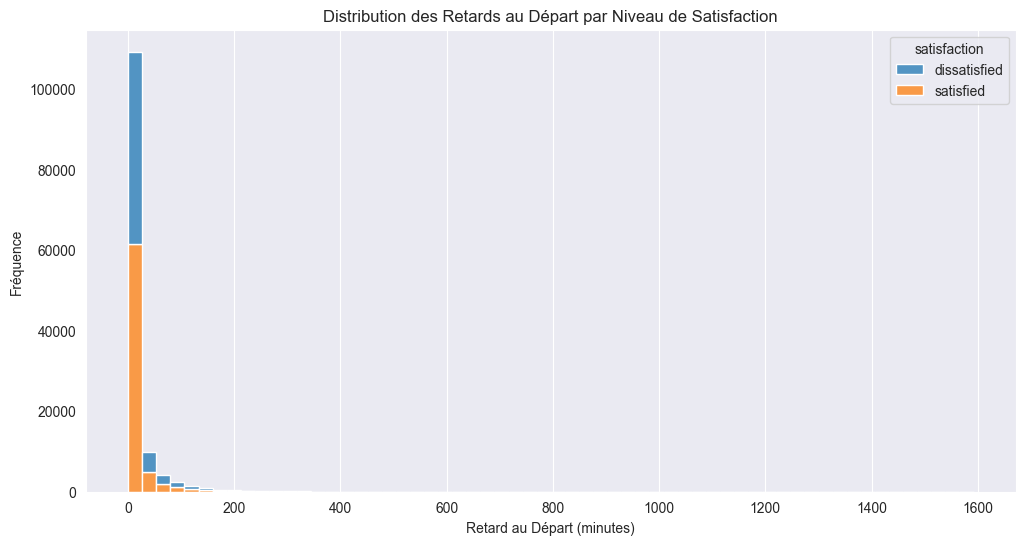

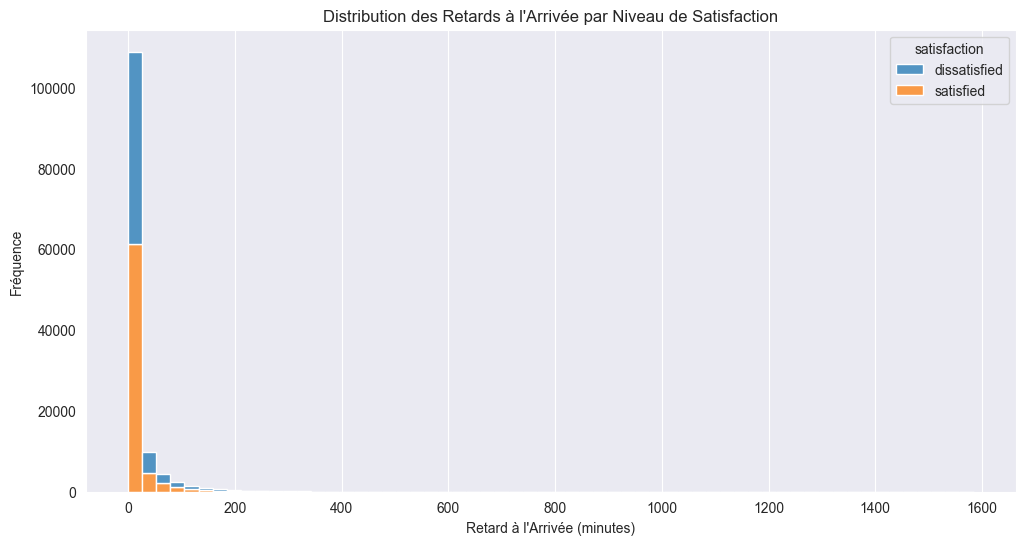

In [28]:
# Histogramme de la satisfaction par rapport aux retards au départ
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Retard au Départ en Minutes', hue='satisfaction', multiple='stack', bins=60)
plt.title('Distribution des Retards au Départ par Niveau de Satisfaction')
plt.xlabel('Retard au Départ (minutes)')
plt.ylabel('Fréquence')
plt.grid(axis='y')
plt.show()

# Histogramme de la satisfaction par rapport aux retards à l'arrivée
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Retard à l’Arrivée en Minutes', hue='satisfaction', multiple='stack', bins=60)
plt.title('Distribution des Retards à l\'Arrivée par Niveau de Satisfaction')
plt.xlabel('Retard à l\'Arrivée (minutes)')
plt.ylabel('Fréquence')
plt.grid(axis='y')
plt.show()

- **Évolution des Retards en Fonction de la Satisfaction**

Pour approfondir notre compréhension de l'impact des retards sur la satisfaction, nous allons analyser les moyennes des retards au départ et à l'arrivée pour chaque niveau de satisfaction.

C:\Users\user\AppData\Local\Temp\ipykernel_6652\3742915435.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delays = data.groupby('satisfaction')[['Retard au Départ en Minutes', 'Retard à l’Arrivée en Minutes']].mean().reset_index()


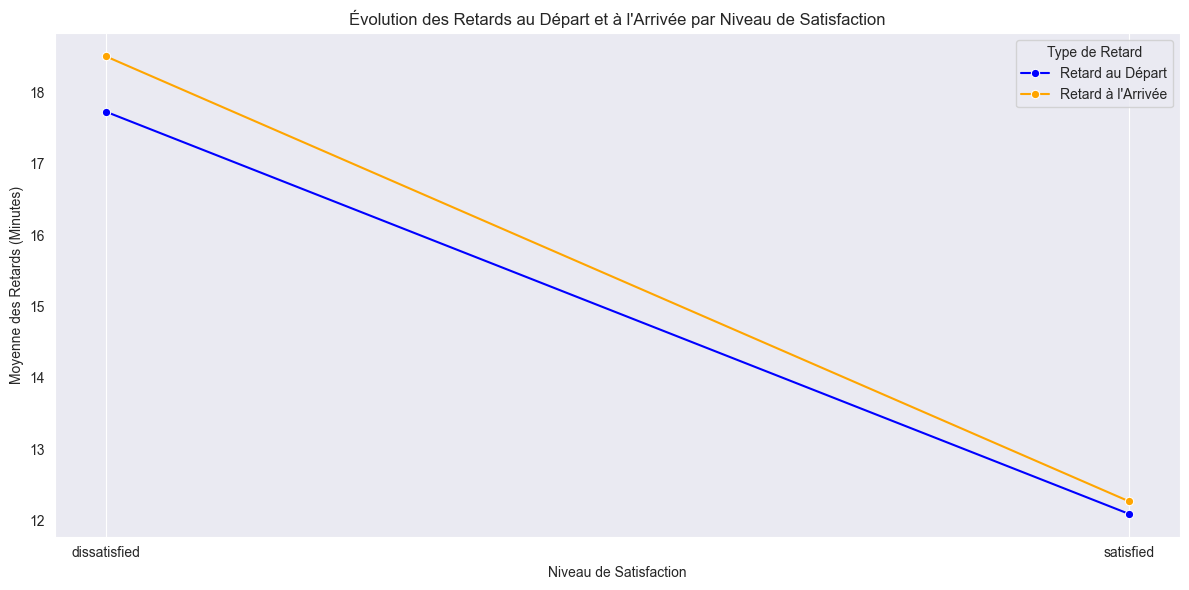

In [29]:
# Calculer la moyenne des retards au départ et à l'arrivée pour chaque niveau de satisfaction
avg_delays = data.groupby('satisfaction')[['Retard au Départ en Minutes', 'Retard à l’Arrivée en Minutes']].mean().reset_index()

# Configurer la figure pour la visualisation
plt.figure(figsize=(12, 6))

# Tracer la moyenne des retards au départ
sns.lineplot(data=avg_delays, x='satisfaction', y='Retard au Départ en Minutes', marker='o', label='Retard au Départ', color='blue')

# Tracer la moyenne des retards à l'arrivée
sns.lineplot(data=avg_delays, x='satisfaction', y='Retard à l’Arrivée en Minutes', marker='o', label='Retard à l\'Arrivée', color='orange')

# Ajouter des titres et des labels pour une meilleure lisibilité
plt.title('Évolution des Retards au Départ et à l\'Arrivée par Niveau de Satisfaction')
plt.xlabel('Niveau de Satisfaction')
plt.ylabel('Moyenne des Retards (Minutes)')
plt.legend(title='Type de Retard')
plt.grid(axis='y')
plt.tight_layout()  # Ajuster la mise en page pour éviter le chevauchement
plt.show()

In [30]:
# Moyenne des retards au départ et à l'arrivée pour chaque niveau de satisfaction
avg_delays

,satisfaction,Retard au Départ en Minutes,Retard à l’Arrivée en Minutes
0,dissatisfied,17.728777,18.504599
1,satisfied,12.092393,12.268883


**Interprétation des Retards et de la Satisfaction**

L'analyse des histogrammes et de l'évolution des retards en fonction des niveaux de satisfaction met en lumière des tendances significatives :

- **Impact des Retards sur la Satisfaction** :  
  Les histogrammes indiquent que les clients insatisfaits rencontrent des retards plus importants. En moyenne, les retards au départ pour les clients insatisfaits s'élèvent à **17,73 minutes**, tandis que les retards à l'arrivée atteignent **18,50 minutes**. En revanche, les clients satisfaits bénéficient de retards moindres, avec une moyenne de **12,09 minutes** au départ et **12,27 minutes** à l'arrivée.

- **Corrélation entre Retards et Satisfaction** :  
  Cette analyse suggère qu'une diminution des retards pourrait avoir un effet positif sur la satisfaction des clients. L'évolution des retards selon les niveaux de satisfaction renforce cette conclusion, soulignant l'importance d'optimiser les opérations pour réduire les retards.

En résumé, l'amélioration de la ponctualité pourrait non seulement diminuer les retards, mais également contribuer à une expérience client plus positive.


### 5. **Analyse des Services par Rapport à la Satisfaction**

Dans cette section, nous allons analyser les moyennes des évaluations de certains services par rapport à la satisfaction des clients. Cela nous permettra d'identifier les services qui pourraient contribuer à l'insatisfaction et d'orienter nos efforts d'amélioration.

C:\Users\user\AppData\Local\Temp\ipykernel_6652\637923155.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_analysis = data.groupby('satisfaction')[services_columns].mean()


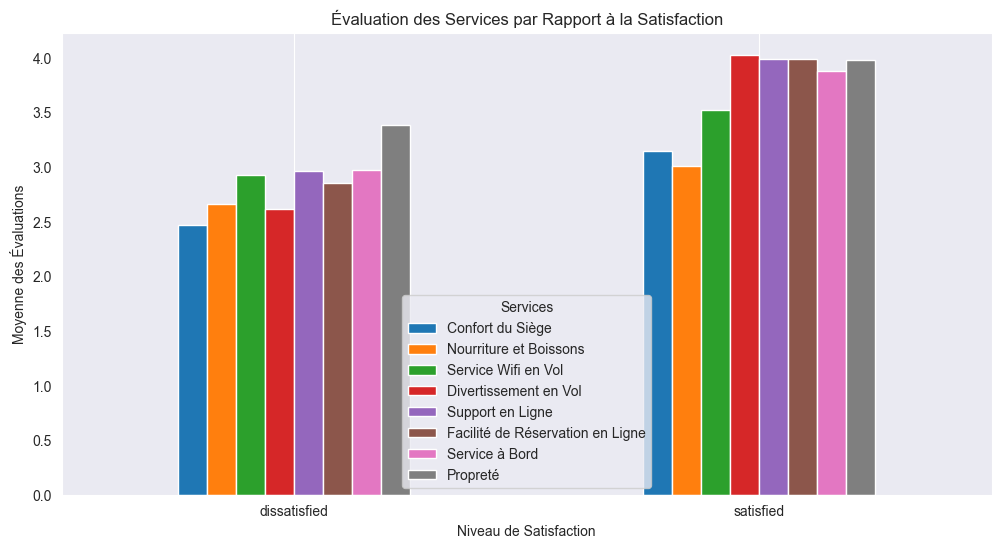

In [31]:
# Liste des colonnes de services à analyser
services_columns = ['Confort du Siège', 'Nourriture et Boissons', 'Service Wifi en Vol', 
                    'Divertissement en Vol', 'Support en Ligne', 'Facilité de Réservation en Ligne', 
                    'Service à Bord', 'Propreté']

# Calcul des moyennes des évaluations des services par rapport à la satisfaction
satisfaction_analysis = data.groupby('satisfaction')[services_columns].mean()

# Visualisation des moyennes des services
satisfaction_analysis.plot(kind='bar', figsize=(12, 6))
plt.title('Évaluation des Services par Rapport à la Satisfaction')
plt.ylabel('Moyenne des Évaluations')
plt.xlabel('Niveau de Satisfaction')
plt.xticks(rotation=0)
plt.legend(title='Services')
plt.grid(axis='y')
plt.show()

### **Interprétation**

Le graphique illustre les évaluations des différents services en fonction des niveaux de satisfaction des clients. Il est **évident** que :

- **Les clients satisfaits** attribuent des notes nettement plus élevées dans presque tous les domaines.
- Par exemple, **le confort des sièges** et **le service Wi-Fi en vol** montrent un écart significatif entre les deux groupes, soulignant l'impact direct de ces services sur la satisfaction globale.

Cette analyse suggère qu'en ciblant l'amélioration des services perçus comme déficients, l'entreprise peut considérablement **rehausser l'expérience des passagers** et, par conséquent, **augmenter la satisfaction client**.


---

---

# **Conclusion**

---

L'analyse approfondie des données de satisfaction des clients a révélé des **corrélations significatives** entre plusieurs facteurs clés influençant l'expérience des passagers, notamment le **type de client**, la **classe de voyage**, la **qualité des services** offerts à bord, ainsi que les **retards** au départ et à l'arrivée. Ces relations ont enrichi notre compréhension des causes de l'**insatisfaction** et ont permis de proposer des pistes d'amélioration ciblées.

Nos analyses ont particulièrement mis en lumière que :

- Les **clients fidèles** et les **voyageurs en classe affaires** expriment généralement un niveau de satisfaction plus élevé.
- Les **retards**, qu'ils soient au départ ou à l'arrivée, exercent un **impact négatif direct** sur la satisfaction des passagers.
- La **qualité des services à bord**, incluant le **confort des sièges**, la **nourriture**, et le **divertissement**, s'avère cruciale pour la perception globale des passagers.

En combinant des **analyses statistiques**, des **régressions linéaires** et des **visualisations graphiques**, nous avons identifié les leviers d'action les plus pertinents pour améliorer l'expérience client. Ces résultats fournissent des **recommandations stratégiques** concrètes, permettant aux compagnies aériennes d'**optimiser leurs services** et de mieux répondre aux attentes des voyageurs.

En somme, ce projet démontre l'importance capitale de l'**analyse de données structurée** pour éclairer la prise de décision dans un secteur compétitif tel que l'aviation. Comprendre les **besoins des clients** et gérer proactivement les **facteurs d'insatisfaction** sont essentiels pour fidéliser les passagers et garantir une **croissance durable** dans l'industrie aérienne.
